In [60]:
import pandas as pd
import numpy as np
import glob
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow as tf
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split

# Importing images

In [ ]:
shape = 128

In [61]:
## if on juno
X1 = []
for filename in glob.glob('/Users/samiradarocha/code/Krastro/whereswally/raw_data/128/notwaldo/*.jpg'):
    im=Image.open(filename)
    X1.append(im)
    
X2 = []
for filename in glob.glob('/Users/samiradarocha/code/Krastro/whereswally/raw_data/128/waldo/*.jpg'):
    im=Image.open(filename)
    X2.append(im)

In [ ]:
## if on colab
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/Hey-Waldo-master/'

X1 = []
path = f'{shape}/notwaldo/*jpg'
for filename in glob.glob(data_path+path):
    im=Image.open(filename)
    X1.append(im)
    
X2 = []
# path = f"Hey-Waldo-master/{shape}/waldo/*jpg"
path = f"{shape}/waldo-centered/*jpg"
for filename in glob.glob(data_path+path):
    im=Image.open(filename)
    X2.append(im)

In [62]:
len(X1)

1317

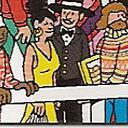

In [4]:
X1[0]

In [5]:
y1= np.zeros(len(X1))

In [7]:
len(X2)

27

In [8]:
np.array(X2[0]).shape

(128, 128, 3)

In [9]:
y2= np.ones(len(X2))

In [10]:
X = np.concatenate((X1, X2), axis=0)
y = np.concatenate((y1, y2), axis=0)

<__array_function__ internals>:180: FutureWarning: The input object of type 'JpegImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'JpegImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


# Croping_image function

In [ ]:
from numpy.ma.core import ceil, floor
from pandas.core.strings.accessor import is_integer

def crop_image(img):
    
    """
    Pass the image as pillow acess on index [0]
    """
    size = 128

    params = np.array(img).shape

    #params[0] is the hight
    #params[1] is the width

    cont_left = floor(params[1]/size)
    max_left = cont_left * size 
    left_param = (params[1] - max_left) / 2

    if left_param.is_integer():
        left = int(left_param)  
        right = int(params[1] - left)
    else:
        left = int(ceil(left_param))
        right = int(params[1] - (left-1))


    cont_upper = floor(params[0]/size)
    max_upper = cont_upper * size 
    upper_param = (params[0] - max_upper) / 2  

    if upper_param.is_integer():
        upper = int(upper_param)  
        lower = int(params[0] - upper)
    else:
        upper = int(ceil(upper_param))
        lower = int(params[0] - (upper-1))

    im_crop = img.crop((left,upper,right,lower))

    return im_crop

# Padding

In [208]:
def custom_padding(img):

    img = np.array(img)/255

    # COLOURED
    # =============
    if img.shape[-1] == 3:
        padded_img = np.zeros([256, 256, 3])

        ## Padding a "intermediate" image 128 x 128
        if img.shape == (128, 128, 3):
            padded_img[64:192, 64:192,:] = img
        ## Padding a "small" image 64 x 64
        if img.shape == (64,64, 3):
            padded_img[96:160, 96:160,:] = img

    # BLACK AND WHITE
    # =============
    if img.shape[-1] == 1:
        padded_img = np.zeros([256, 256, 1])

        ## Padding a "intermediate" image 128 x 128
        if img.shape == (128, 128, 1):
            padded_img[64:192, 64:192,:] = img
        ## Padding a "small" image 64 x 64
        if img.shape == (64,64, 1):
            padded_img[96:160, 96:160,:] = img

    return padded_img

def applying_padding(img):
    X_s = []
    for x in range(len(img)):
        temp = np.array(img[x])
        X_s.append(custom_padding(temp))
    return X_s

# SMOTE

In [ ]:
# shape = 128
ReX  = X2.reshape(X2.shape[0],shape*shape*3)
smt = SMOTE()
Xsm, ysm = smt.fit_resample(ReX, y)

In [ ]:
Xsm.shape

# Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center = False,
    featurewise_std_normalization = False,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    zoom_range = (0.8, 1.2),
    ) 

datagen.fit(y)
datagen

In [ ]:
y_aug = datagen.flow(y, shuffle=False, batch_size=1)

In [ ]:
import numpy as np

for i, (raw_image, augmented_image) in enumerate(zip(X_train, X_augmented_iterator)):
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))
    ax1.imshow(raw_image)
    ax2.imshow(augmented_image[0])
    plt.show()
    
    if i > 10:
        break

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# with SMOTE
X_train2, X_test2, y_train2, y_test2 = train_test_split(Xsm, ysm, 
                                                        test_size=0.3, 
                                                        random_state=2)

In [ ]:
# with Data Aug
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_aug, y_aug, 
                                                        test_size=0.3, 
                                                        random_state=2)

# Our model

In [ ]:
from tensorflow.keras import layers, Sequential,metrics
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

In [ ]:
## heavely overfiting model
def initialize_model():
    model = Sequential()

    model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu',padding='valid', input_shape=X_train2[0].shape))
    model.add(layers.MaxPool2D(pool_size=(2,2))) 

    model.add(layers.Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Conv2D(16, kernel_size=(2, 2), padding='valid', activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2))) 
    model.add(layers.Dropout(0.2))

    model.add(layers.Flatten())

    model.add(layers.Dense(500, activation='relu'))
    model.add(layers.Dropout(0.2))

    model.add(layers.Dense(250, activation='relu'))
    model.add(layers.Dropout(0.2))

    model.add(layers.Dense(150, activation='relu'))
    model.add(layers.Dropout(0.2))  

    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dropout(0.2))

    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dropout(0.2))

    model.add(layers.Dense(1, activation='sigmoid')) 

    return model

model = initialize_model()

In [ ]:
## Luis Model
def initialize_model():
    model = Sequential()

    model.add(layers.Conv2D(16, kernel_size=(3, 3), activation='relu',input_shape=X_train_n[0].shape))
    model.add(layers.MaxPool2D(pool_size=(2,2))) 

    model.add(layers.Conv2D(32, kernel_size=(2, 2), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Conv2D(128, kernel_size=(2, 2), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2))) 
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1, activation='sigmoid')) 

    return model

model = initialize_model()

In [ ]:
model = initialize_model()
model = compile_model(model)
model.summary()

In [ ]:
from tensorflow.keras import callbacks

es = callbacks.EarlyStopping(patience=3, restore_best_weights=True, monitor="loss")

adam_opt = optimizers.Adam(learning_rate=1)

model = initialize_model()
model = compile_model(model,adam_opt)

history = model.fit(X_train2,
                    y_train2,
                    validation_split=0.3,
                    batch_size=128,
                    callbacks=[es],
                    epochs=150,
                    verbose=1)

In [ ]:
model.evaluate(X_test2,y_test2)

## Prediction

In [ ]:
# if in colab

predict_input = []
# p_path = data_path+'/extra-wally-images/Holywood.jpg'
p_path = data_path+'/original-images/4.jpg'
for filename in glob.glob(p_path):
    pr=Image.open(filename)
    predict_input.append(pr)
image_cropped = crop_image(predict_input[0])
image_cropped

In [ ]:
# if in juno

predict_input = []
# p_path = data_path+'/extra-wally-images/Holywood.jpg'
p_path = data_path+'/original-images/4.jpg'
for filename in glob.glob(p_path):
    pr=Image.open(filename)
    predict_input.append(pr)
image_cropped = crop_image(predict_input[0])
image_cropped

In [ ]:
temp = np.array(image_cropped)
print(temp.shape)
M = shape
N = shape
tiles = [temp[x:x+M,y:y+N] for x in range(0,temp.shape[0],M) for y in range(0,temp.shape[1],N)]

In [ ]:
X_predict = np.array([np.array(tiles[x])/255 for x in range(len(tiles))])
temp = model.predict(X_predict)

In [ ]:
temp2 = pd.DataFrame(temp)>=0.001
temp2['probs'] = pd.DataFrame(temp)
temp3 = temp2[temp2[0]==True].sort_values(by=['probs'],ascending=False)
temp3

In [ ]:
fig , axes = plt.subplots(1,5,figsize=(16,4))
axes[0].imshow(tiles[temp3.index[0]])
axes[1].imshow(tiles[temp3.index[1]])
axes[2].imshow(tiles[temp3.index[2]])
axes[3].imshow(tiles[temp3.index[3]])
axes[4].imshow(tiles[temp3.index[4]])

# VGG16 model

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

def load_model():
    model = VGG16(weights="imagenet", include_top=False, input_shape=X_train2[0].shape)  
    return model

In [ ]:
def set_nontrainable_layers(model):

    model.trainable = False
    
    return model

In [ ]:
from tensorflow.keras import models

def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainable, and add additional trainable layers on top'''
    base_model = set_nontrainable_layers(model)
    flatten_layer = layers.Flatten()
    dense_layer = layers.Dense(256, activation='relu')
    dense_layer2 = layers.Dense(128, activation='relu')
    dense_layer3 = layers.Dense(64, activation='relu')
    dense_layer4 = layers.Dense(32, activation='relu')

    prediction_layer = layers.Dense(1, activation='sigmoid')
    
    
    model = models.Sequential([
        base_model,
        flatten_layer,
        dense_layer,
        dense_layer2,
        dense_layer3,
        dense_layer4,
        prediction_layer
    ])
    return model

In [ ]:
def build_model():
   
    model = load_model()
    model = add_last_layers(model)
    
    opt = optimizers.Adam(learning_rate=0.1)
    model.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy',metrics.Recall()])
    return model

In [ ]:
model.summary()

In [ ]:
model = build_model()

es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 2, 
                   verbose = 1, 
                   restore_best_weights = True)

history = model.fit(X_train2,
                    y_train2,
                    validation_split=0.3,
                    batch_size=128,
                    callbacks=[es],
                    epochs=150,
                    verbose=1)

## Predict VGG16

In [ ]:
# if in colab

predict_input = []
# p_path = data_path+'/extra-wally-images/Holywood.jpg'
p_path = data_path+'/original-images/4.jpg'
for filename in glob.glob(p_path):
    pr=Image.open(filename)
    predict_input.append(pr)
image_cropped = crop_image(predict_input[0])
image_cropped

In [ ]:
# if in juno

predict_input = []
# p_path = data_path+'/extra-wally-images/Holywood.jpg'
p_path = data_path+'/original-images/4.jpg'
for filename in glob.glob(p_path):
    pr=Image.open(filename)
    predict_input.append(pr)
image_cropped = crop_image(predict_input[0])
image_cropped

In [ ]:
temp = np.array(image_cropped)
print(temp.shape)
M = shape
N = shape
tiles = [temp[x:x+M,y:y+N] for x in range(0,temp.shape[0],M) for y in range(0,temp.shape[1],N)]

In [ ]:
X_predict = np.array([np.array(tiles[x])/255 for x in range(len(tiles))])
temp = model.predict(X_predict)

In [ ]:
X_predict = np.array([np.array(tiles[x])/255 for x in range(len(tiles))])
temp = model.predict(X_predict)

In [ ]:
fig , axes = plt.subplots(1,5,figsize=(16,4))
axes[0].imshow(tiles[temp3.index[0]])
axes[1].imshow(tiles[temp3.index[1]])
axes[2].imshow(tiles[temp3.index[2]])
axes[3].imshow(tiles[temp3.index[3]])
axes[4].imshow(tiles[temp3.index[4]])

# Inception V3 Model

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

def load_model():
    model = InceptionV3(weights="imagenet", include_top=False, input_shape=X_train2[0].shape, classifier_activation='sigmoid')  
    return model

In [ ]:
def set_nontrainable_layers(model):

    model.trainable = False
    
    return model

In [ ]:
from tensorflow.keras import models

def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainable, and add additional trainable layers on top'''
    # $CHALLENGIFY_BEGIN
    base_model = set_nontrainable_layers(model)
    flatten_layer = layers.Flatten()
    dense_layer = layers.Dense(256, activation='relu')
    dense_layer2 = layers.Dense(128, activation='relu')
    dense_layer3 = layers.Dense(64, activation='relu')
    dense_layer4 = layers.Dense(32, activation='relu')

    prediction_layer = layers.Dense(1, activation='sigmoid')
    
    
    model = models.Sequential([
        base_model,
        flatten_layer,
        dense_layer,
        dense_layer2,
        dense_layer3,
        dense_layer4,
        prediction_layer
    ])
    # $CHALLENGIFY_END
    return model

In [ ]:
def build_model():
   
    model = load_model()
    model = add_last_layers(model)
    
    opt = optimizers.Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy',metrics.Recall()])
    return model

## Predicting

In [ ]:
# if in colab

predict_input = []
# p_path = data_path+'/extra-wally-images/Holywood.jpg'
p_path = data_path+'/original-images/4.jpg'
for filename in glob.glob(p_path):
    pr=Image.open(filename)
    predict_input.append(pr)
image_cropped = crop_image(predict_input[0])
image_cropped

In [ ]:
# if in juno

predict_input = []
# p_path = data_path+'/extra-wally-images/Holywood.jpg'
p_path = data_path+'/original-images/4.jpg'
for filename in glob.glob(p_path):
    pr=Image.open(filename)
    predict_input.append(pr)
image_cropped = crop_image(predict_input[0])
image_cropped

In [ ]:
temp = np.array(image_cropped)
print(temp.shape)
M = shape
N = shape
tiles = [temp[x:x+M,y:y+N] for x in range(0,temp.shape[0],M) for y in range(0,temp.shape[1],N)]

In [ ]:
X_predict = np.array([np.array(tiles[x])/255 for x in range(len(tiles))])
temp = model.predict(X_predict)

In [ ]:
temp2 = pd.DataFrame(temp)>=0.4
temp2['probs'] = pd.DataFrame(temp)
temp3 = temp2[temp2[0]==True].sort_values(by=['probs'],ascending=False)
temp3

In [ ]:
fig , axes = plt.subplots(1,5,figsize=(16,4))
axes[0].imshow(tiles[temp3.index[0]])
axes[1].imshow(tiles[temp3.index[1]])
axes[2].imshow(tiles[temp3.index[2]])
axes[3].imshow(tiles[temp3.index[3]])
axes[4].imshow(tiles[temp3.index[4]])